In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
file_path = "/content/new data 01.csv"

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data.columns

Index(['DateTime', 'Temperature(℃)', 'Rainfall (mm)', 'Relative Humidity(%)'], dtype='object')

In [ ]:
data.head(10)

,#NAME?,Temperature(℃),Rainfall (mm),Relative Humidity(%),month,day,hour,year,Risk_Factor
1,2024-08-28 08:30:00,0.237213,-0.859540,-1.561404,8,28,8,2024,0.289048
2,2024-08-28 11:30:00,0.909577,-0.253697,0.104475,8,28,11,2024,0.572729
3,2024-08-28 14:30:00,0.991266,1.185181,0.852523,8,28,14,2024,0.780086
4,2024-08-28 17:30:00,0.406874,1.185181,1.279499,8,28,17,2024,0.711158
5,2024-08-28 20:30:00,-0.070692,1.166248,0.348221,8,28,20,2024,0.567596
6,2024-08-28 23:30:00,-0.466570,-0.443023,0.301152,8,28,23,2024,0.337569
7,2024-08-29 02:30:00,-0.887583,-0.045438,0.109518,8,29,2,2024,0.294386
8,2024-08-29 05:30:00,-1.415420,-0.367293,0.062449,8,29,5,2024,0.171099
9,2024-08-29 08:30:00,-0.227787,-0.859540,0.200292,8,29,8,2024,0.328991
10,2024-08-29 11:30:00,0.765050,-0.859540,-0.604911,8,29,11,2024,0.440775


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #NAME?                41 non-null     object 
 1   Temperature(℃)        40 non-null     float64
 2   Rainfall (mm)         40 non-null     float64
 3   Relative Humidity(%)  40 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.4+ KB


In [ ]:
data["#NAME?"].unique()

array(['8/28/2024 5:30', '8/28/2024 8:30', '8/28/2024 11:30',
       '8/28/2024 14:30', '8/28/2024 17:30', '8/28/2024 20:30',
       '8/28/2024 23:30', '8/29/2024 2:30', '8/29/2024 5:30',
       '8/29/2024 8:30', '8/29/2024 11:30', '8/29/2024 14:30',
       '8/29/2024 17:30', '8/29/2024 20:30', '8/29/2024 23:30',
       '8/30/2024 2:30', '8/30/2024 5:30', '8/30/2024 8:30',
       '8/30/2024 11:30', '8/30/2024 14:30', '8/30/2024 17:30',
       '8/30/2024 20:30', '8/30/2024 23:30', '8/31/2024 2:30',
       '8/31/2024 5:30', '8/31/2024 8:30', '8/31/2024 11:30',
       '8/31/2024 14:30', '8/31/2024 17:30', '8/31/2024 20:30',
       '8/31/2024 23:30', '09-01-2024 02:30', '09-01-2024 05:30',
       '09-01-2024 08:30', '09-01-2024 11:30', '09-01-2024 14:30',
       '09-01-2024 17:30', '09-01-2024 20:30', '09-01-2024 23:30',
       '09-02-2024 02:30', '09-02-2024 05:30'], dtype=object)

In [ ]:
unique_dates_count = data['#NAME?'].nunique()
print(f"Number of unique dates: {unique_dates_count}")

Number of unique dates: 40


In [ ]:
#Convert Date column to datetime format with specific format
data['#NAME?'] = pd.to_datetime(data['#NAME?'], format='mixed')


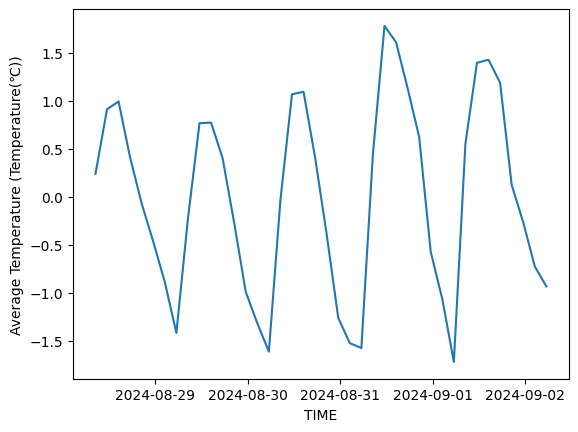

In [ ]:

plt.plot(data['#NAME?'], data['Temperature(℃)'])
plt.xlabel('TIME')
plt.ylabel('Average Temperature (Temperature(℃))')
plt.show()


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 #NAME?                  0
Temperature(℃)          0
Rainfall (mm)           0
Relative Humidity(%)    0
month                   0
day                     0
hour                    0
year                    0
Risk_Factor             0
dtype: int64

Percentage of Missing Data:
 #NAME?                  0.0
Temperature(℃)          0.0
Rainfall (mm)           0.0
Relative Humidity(%)    0.0
month                   0.0
day                     0.0
hour                    0.0
year                    0.0
Risk_Factor             0.0
dtype: float64


In [ ]:
data.head(10)

,#NAME?,Temperature(℃),Rainfall (mm),Relative Humidity(%),month,day,hour,year,Risk_Factor
1,2024-08-28 08:30:00,0.237213,-0.859540,-1.561404,8,28,8,2024,0.289048
2,2024-08-28 11:30:00,0.909577,-0.253697,0.104475,8,28,11,2024,0.572729
3,2024-08-28 14:30:00,0.991266,1.185181,0.852523,8,28,14,2024,0.780086
4,2024-08-28 17:30:00,0.406874,1.185181,1.279499,8,28,17,2024,0.711158
5,2024-08-28 20:30:00,-0.070692,1.166248,0.348221,8,28,20,2024,0.567596
6,2024-08-28 23:30:00,-0.466570,-0.443023,0.301152,8,28,23,2024,0.337569
7,2024-08-29 02:30:00,-0.887583,-0.045438,0.109518,8,29,2,2024,0.294386
8,2024-08-29 05:30:00,-1.415420,-0.367293,0.062449,8,29,5,2024,0.171099
9,2024-08-29 08:30:00,-0.227787,-0.859540,0.200292,8,29,8,2024,0.328991
10,2024-08-29 11:30:00,0.765050,-0.859540,-0.604911,8,29,11,2024,0.440775


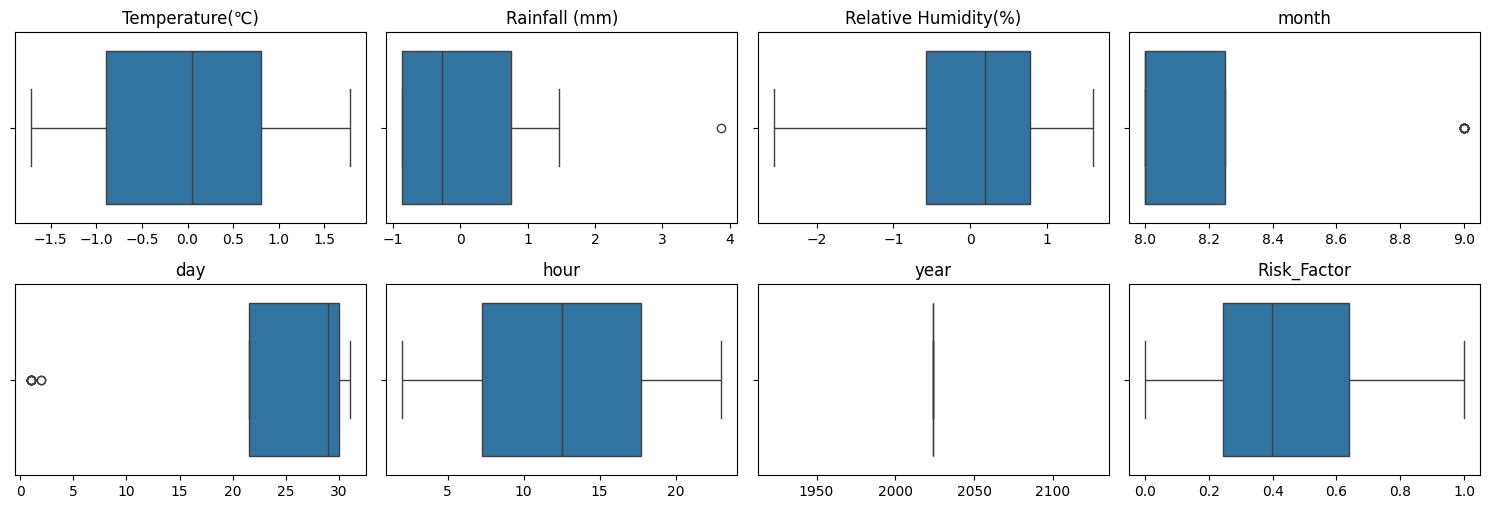

In [ ]:
# Plot box plots for each feature
plt.figure(figsize=(15, 10))
X=data.drop(['#NAME?'],axis=1)
features=X.columns
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)  # Adjust the number of rows and columns based on the number of features
    sns.boxplot(x=X[feature])
    plt.title(feature)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Extract month, day, and hour from the 'date' column
data['month'] = data['#NAME?'].dt.month
data['day'] = data['#NAME?'].dt.day
data['hour'] = data['#NAME?'].dt.hour
data['year'] = data['#NAME?'].dt.year

KeyError: '#NAME?'

In [ ]:
# Feature scaling: Standardize the features
scaler = StandardScaler()
data[['Temperature(℃)', 'Rainfall (mm)', 'Relative Humidity(%)']] = scaler.fit_transform(data[['Temperature(℃)', 'Rainfall (mm)', 'Relative Humidity(%)']])

# Define weights for each feature based on domain knowledge or testing
# For example: Temperature might have the highest impact, followed by Rainfall, and then Humidity
weights = {'Temperature(℃)': 0.5, 'Rainfall (mm)': 0.3, 'Relative Humidity(%)': 0.2}

# Compute a risk score as a weighted sum of the standardized features
data['Risk_Factor'] = (weights['Temperature(℃)'] * data['Temperature(℃)'] +weights['Rainfall (mm)'] * data['Rainfall (mm)'] +weights['Relative Humidity(%)'] * data['Relative Humidity(%)'])

# Normalize the risk factor to bring it between 0 and 1
data['Risk_Factor'] = (data['Risk_Factor'] - data['Risk_Factor'].min()) / (data['Risk_Factor'].max() - data['Risk_Factor'].min())

# Display the first few rows with the computed Risk_Factor
print(data.head())


               #NAME?  Temperature(℃)  Rainfall (mm)  Relative Humidity(%)  \
1 2024-08-28 08:30:00        0.237213      -0.859540             -1.561404   
2 2024-08-28 11:30:00        0.909577      -0.253697              0.104475   
3 2024-08-28 14:30:00        0.991266       1.185181              0.852523   
4 2024-08-28 17:30:00        0.406874       1.185181              1.279499   
5 2024-08-28 20:30:00       -0.070692       1.166248              0.348221   

   month  day  hour  year  Risk_Factor  
1      8   28     8  2024     0.289048  
2      8   28    11  2024     0.572729  
3      8   28    14  2024     0.780086  
4      8   28    17  2024     0.711158  
5      8   28    20  2024     0.567596  


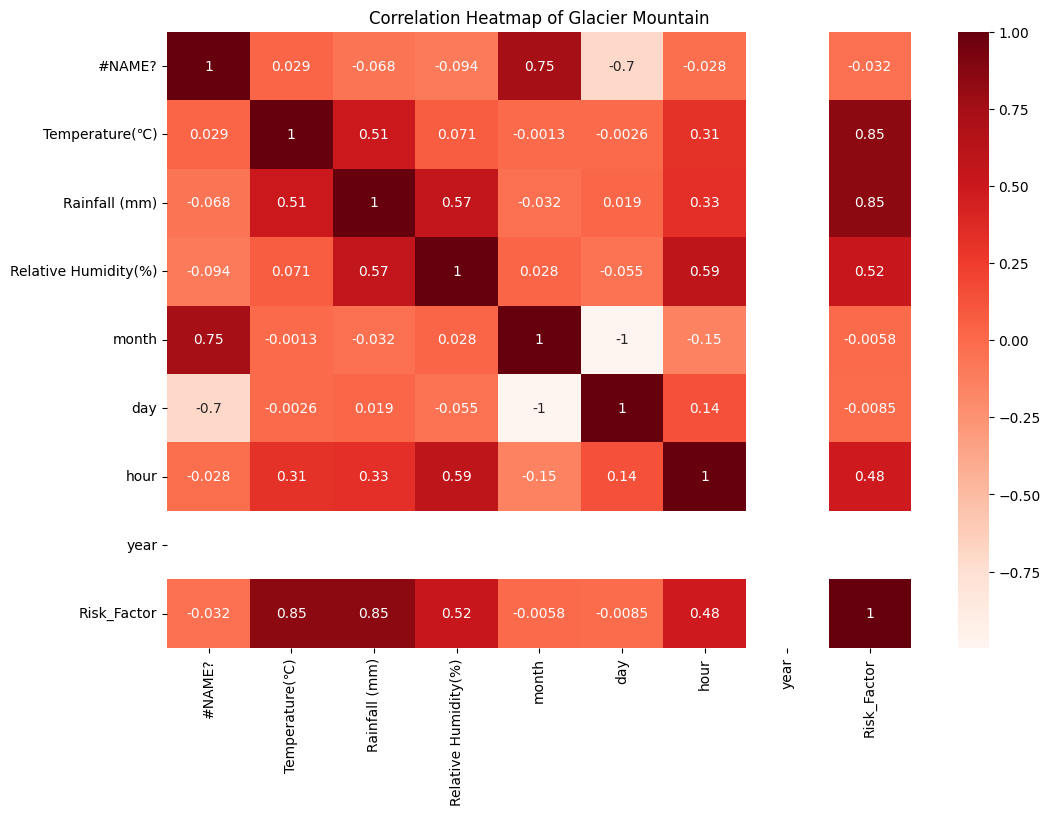

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='Reds')
plt.title('Correlation Heatmap of Glacier Mountain')
plt.show()

In [ ]:
# Save the updated dataframe to a new CSV file
data.to_csv('glof_risk_with_scores.csv', index=False)

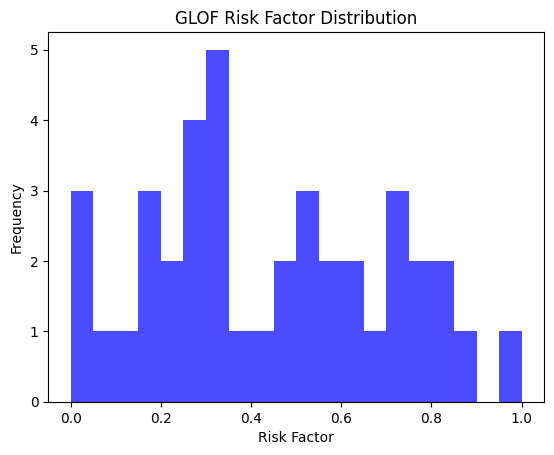

In [ ]:
# Optionally, you can plot the risk factor distribution
import matplotlib.pyplot as plt

plt.hist(data['Risk_Factor'], bins=20, color='blue', alpha=0.7)
plt.title('GLOF Risk Factor Distribution')
plt.xlabel('Risk Factor')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X = data[['hour', 'day', 'month', 'year', 'Temperature(℃)', 'Rainfall (mm)', 'Relative Humidity(%)']]  # Input features
y = data['Risk_Factor']  # Target: Risk score predicting the likelihood of a GLOF event

In [ ]:
# 5. Split Data for Time-Series Cross Validation
# Using TimeSeriesSplit to respect the temporal order in the data

from sklearn.model_selection import TimeSeriesSplit


tscv = TimeSeriesSplit(n_splits=5)
rmse_list, mae_list, r2_list = [], [], []

In [ ]:
# 6. Train and Evaluate the Model using TimeSeriesSplit
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
# Build and Train the Regression Model
model = LinearRegression() # Removed extra indent
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on Test Set
y_pred = model.predict(X_test)

In [ ]:
 # Evaluate the Model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


rmse_list.append(rmse)
mae_list.append(mae)
r2_list.append(r2)

In [ ]:
#Calculate Average Evaluation Metrics across all splits
avg_rmse = np.mean(rmse_list)
avg_mae = np.mean(mae_list)
avg_r2 = np.mean(r2_list)

In [ ]:
# 8. Print Evaluation Metrics
print(f"Average RMSE (Root Mean Squared Error): {avg_rmse:.4f}")
print(f"Average MAE (Mean Absolute Error): {avg_mae:.4f}")
print(f"Average R-squared (R²): {avg_r2:.4f}")

Average RMSE (Root Mean Squared Error): 0.0000
Average MAE (Mean Absolute Error): 0.0000
Average R-squared (R²): 1.0000


In [ ]:
# Optional: Print feature coefficients to understand which factors are most influential
print("Feature Coefficients:", model.coef_)

Feature Coefficients: [-7.43922585e-18 -1.38777878e-17 -8.36245136e-16  6.93889390e-18
  1.66653895e-01  9.99923373e-02  6.66615582e-02]


In [ ]:
# Assuming avg_rmse, avg_mae, and avg_r2 are calculated metrics from our model evaluation

# Thresholds for categorization
rmse_threshold_high = 0.5  # Example: RMSE above this is considered "High" risk
rmse_threshold_low = 0.2   # Example: RMSE below this is considered "Low" risk

mae_threshold_high = 0.4   # Example: MAE above this is considered "High" risk
mae_threshold_low = 0.1    # Example: MAE below this is considered "Low" risk

r2_threshold_high = 0.8    # Example: R² below this is considered "High" risk
r2_threshold_low = 0.6     # Example: R² above this is considered "Low" risk

# Function to categorize risk based on RMSE, MAE, and R²
def categorize_risk_based_on_metrics(rmse, mae, r2):
    if rmse > rmse_threshold_high or mae > mae_threshold_high or r2 < r2_threshold_low:
        return "High"
    elif rmse < rmse_threshold_low and mae < mae_threshold_low and r2 > r2_threshold_high:
        return "Low"
    else:
        return "Medium"

# Categorize risk based on the performance metrics
risk_category = categorize_risk_based_on_metrics(avg_rmse, avg_mae, avg_r2)

# Print the results
print(f"Average RMSE (Root Mean Squared Error): {avg_rmse:.4f}")
print(f"Average MAE (Mean Absolute Error): {avg_mae:.4f}")
print(f"Average R-squared (R²): {avg_r2:.4f}")
print(f"GLOF Risk Category: {risk_category}")


Average RMSE (Root Mean Squared Error): 0.0000
Average MAE (Mean Absolute Error): 0.0000
Average R-squared (R²): 1.0000
GLOF Risk Category: Low
